In [5]:
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
# set variablelen
variabelen = {}
# variabelen['zeroth-moment significant wave height']        = {'symbool':'H_m0', 'eenheid':'m'}
# variabelen['wave period associated with the spectral peak']= {'symbool':'T_p', 'eenheid':'s'}
# variabelen['levee crest elevation']                        = {'symbool':'h_c', 'eenheid':'m'}
# variabelen['storm surge elevation']                        = {'symbool':'h_S', 'eenheid':'m'}
# variabelen['freeboard [=h_c-h_S]']                         = {'symbool':'R_c', 'eenheid':'m'}
# variabelen['seaward-side levee slope']                     = {'symbool':'θ_ss', 'eenheid':'°'}
# variabelen['landward-side levee slope']                    = {'symbool':'θ_ls', 'eenheid':'°'}
# variabelen['specific height of sea water']                 = {'symbool':'γ_w', 'eenheid':'kg/m3'}
variabelen['acceleration due to gravity']                  = {'symbool':'g', 'eenheid':'m/s2'}
variabelen['manning coefficient']                          = {'symbool':'n', 'eenheid':'s/m^(1/3)'}
variabelen['density of water']                             = {'symbool':'ρ_w', 'eenheid':'kg/m3'}
variabelen['run-up height']                                = {'symbool':'ρ_w', 'eenheid':'kg/m3'}

In [7]:
# variabelen['zeroth-moment significant wave height']['waarde'] = 2.4384 # 8#
# variabelen['wave period associated with the spectral peak']['waarde'] = 10 # 10
# variabelen['levee crest elevation']['waarde'] = 4.57200 # 15#
# variabelen['storm surge elevation']['waarde'] = 5.57784 # 18.3
# variabelen['freeboard [=h_c-h_S]']['waarde'] = variabelen['levee crest elevation']['waarde'] - variabelen['storm surge elevation']['waarde']
# variabelen['seaward-side levee slope']['waarde'] = 14.03662 # 1/4
# variabelen['landward-side levee slope']['waarde'] = 18.43494 # 1/3
# variabelen['specific height of sea water']['waarde'] = 1025.18166 # 64#
variabelen['acceleration due to gravity']['waarde'] = 9.81456 # 32.2#
variabelen['manning coefficient']['waarde'] = 0.02
variabelen['density of water']['waarde'] = 1025.18166 # 64#   

In [8]:
def eq20(ρ_w,n,v,d):
    """
    Input parameters
    ρ_w          :  density of water (kg/m3)
    n            :  manning coefficient (s/m(1/3))
    v            :  main velocity parallel to the embankment surface (m/s)
    d            :  water depth parallel to the embankment surface subsituted for hydraulic radius (m)    

    Returns τ is the bed shear stress (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]    
    """
    τ = ρ_w * v**2 * n**2 / d**(1/3)
    return τ * 10

In [9]:
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf1_3.pkl')
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf4_6.pkl')
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf7_9.pkl')
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf10_12.pkl')
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_145.pkl')
#df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_2.pkl')
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_3.pkl')

In [10]:
talud = 1.8
f     = 0.02
v0    = df.index.get_level_values(2)[0]
h0    = df.index.get_level_values(3)[0]
#df.loc[(talud,f,v0,h0),'vB'].plot()

vB = df.loc[(talud,f,v0,h0),'vB'].mean()
hB = df.loc[(talud,f,v0,h0),'hB'].mean()

# calculate average overtopping discharge
ρ_w   = variabelen['density of water']['waarde']
n     = variabelen['manning coefficient']['waarde']
g     = variabelen['acceleration due to gravity']['waarde']

#eq20(ρ_w,n,vB,hB)

# shear stress estimates assuming Sf includes only the levee slope and water surface slope
n_sB = []
n_mu = []
for idx in range(len(df.loc[(talud,f,v0,h0),'hB'])):
    hB  = df.loc[(talud,f,v0,h0),'hB'].iloc[idx]
    vB  = df.loc[(talud,f,v0,h0),'vB'].iloc[idx]
    sB  = df.loc[(talud,f,v0,h0),'hB'][df.loc[(talud,f,v0,h0),'hB'] == hB].index[0]
    #ds = s2-s1
    
    τ_0 = eq20(ρ_w,n,vB,hB)
    
    #print (s1,τ_0)
    n_sB.append(sB)
    n_mu.append(τ_0)
s_eq20 = pd.Series(data=n_mu, index=n_sB)
s_eq20.index.name = 'sB'
#s.interpolate(method='spline', order=3).plot()
#τ_0_mean = s_eq6.mean()
s_eq20.mean()

482.57869908679663

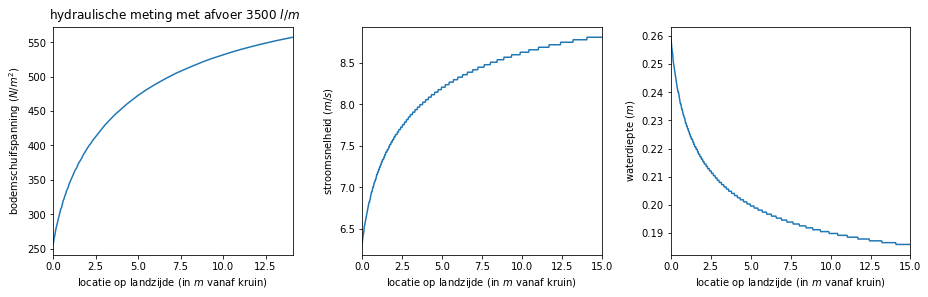

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(131)    # The big subplot
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

s_eq20.plot(ax=ax1)
ax1.set_ylabel('bodemschuifspanning ($N/m^2$)')
ax1.set_xlabel('locatie op landzijde (in $m$ vanaf kruin)')
#ax1.grid(True)
df.loc[(talud,f,v0,h0),'vB'].plot(ax=ax2)
ax2.set_ylabel('stroomsnelheid ($m/s$)')
ax2.set_xlabel('locatie op landzijde (in $m$ vanaf kruin)')
#ax2.grid(True)
df.loc[(talud,f,v0,h0),'hB'].plot(ax=ax3)
ax3.set_ylabel('waterdiepte ($m$)')
ax3.set_xlabel('locatie op landzijde (in $m$ vanaf kruin)')
#ax3.grid(True)
plt.suptitle('hydraulische meting met afvoer 3500 $l/m$', x=0.19, y=1.02)
plt.tight_layout()
#plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-08-22//vDamme_tau_v_u_3500lm.PNG', dpi=90, bbox_inches='tight')

In [ ]:
def eq5(γ_w,η_m):
    """
    Input parameters
    η_m          :  mean flow thickness (m)
    γ_w,         :  specific height of sea water (kg/m3)
    θ_ls         :  landward-side levee slope (°)
    
    Returns τ_0_mean is the mean shear stress (kg/m2 [kg force/square meter])
    """
    τ_0_mean = γ_w*η_rms*np.sin(np.deg2rad(θ_ls))
    return τ_0_mean

def eq8(γ_w,η_rms):
    """
    Input parameters
    η_rms        :  root-mean-squared flow thickness (m)
    γ_w,         :  specific height of sea water (kg/m3)
    
    Returns τ_0_mean is the mean shear stress (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]
    """
    τ_0_mean = 0.235*γ_w*η_rms
    return τ_0_mean * 10

def eq9(η_m, g, H_m0, T_p, q_ws):
    """
    Input parameters
    η_m          :  mean flow thickness (m)
    g            :  acceleration due to gravity (m/s2)
    H_m0         :  zeroth-moment significant wave height (m)
    T_p          :  wave period associated with the spectral peak (s)
    q_ws         :  average discharge (m3/s)
    
    Returns η_rms which is the root-mean-squared flow depth (m)
    """
    η_rms = η_m + 0.0077 * (g*H_m0*T_p/q_ws)**(2/3) * η_m    
    return η_rms

def eq10(g, θ_ls, q_ws):
    """
    Input parameters
    g            :  acceleration due to gravity (m/s2)
    θ_ls         :  landward-side levee slope (°)
    q_ws         :  average discharge (m3/s)
    
    Returns η_m which is the mean flow thickness (m)
    """
    η_m = 0.4*((1/(g*np.sin(np.deg2rad(θ_ls))))**(1/3))*(q_ws**(2/3))
    return η_m

def eq11a(R_c, H_m0):
    """
    Input parameters 
    R_c          :  freeboard [=h_c-h_S] (m)
    H_m0         :  zeroth-moment significant wave height (m)
    
    Returned value is equal to q_ws / np.sqrt(g*H_m0**3)
    """
    out_eq11a = 0.0336+0.53*(-R_c/H_m0)**1.58        
    return out_eq11a

def eq11b(out_eq11a, g, H_m0):
    """
    Input parameters
    eq11a        :  output of equation eq11a 
    g            :  acceleration due to gravity (m/s2)
    H_m0         :  zeroth-moment significant wave height (m)
    
    Returns q_ws (average discharge)
    """
    q_ws = np.sqrt(g*H_m0**3) * out_eq11a
    return q_ws

def eq12(γ_w, H_rms):
    """
    Input parameters
    H_rms        :  root-mean-squared wave height (m)
    γ_w,         :  specific height of sea water (kg/m3)
    
    Returns τ_0_1_3 which is the peak shear stress corresponding to 
    the average of the highest 1/3 shear stress peaks (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]
    """    
    τ_0_1_3 = 0.53 * γ_w * H_rms
    return τ_0_1_3 * 10

def eq13(γ_w, H_rms):
    """
    Input parameters
    H_rms        :  root-mean-squared wave height (m)
    γ_w,         :  specific height of sea water (kg/m3)
    
    Returns τ_0_1_10 which is the peak shear stress corresponding to 
    the average of the highest 1/10 shear stress peaks (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]
    """    
    τ_0_1_10 = 0.69 * γ_w * H_rms
    return τ_0_1_10 * 10

def eq14(γ_w, H_rms):
    """
    Input parameters
    H_rms        :  root-mean-squared wave height (m)
    γ_w,         :  specific height of sea water (kg/m3)
    
    Returns τ_0_1_100 which is the peak shear stress corresponding to 
    the average of the highest 1/100 shear stress peaks (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]
    """    
    τ_0_1_100 = 0.93 * γ_w * H_rms
    return τ_0_1_100 * 10

def eq15(R_c, η_m, H_m0):
    """
    Input parameters
    R_c          :  freeboard [=h_c-h_S] (m)
    H_m0         :  zeroth-moment significant wave height (m)
    η_m          :  mean flow thickness (m)
    
    Returns H_rms which is the root-mean-squared wave height (m)
    """
    H_rms = η_m * (3.43 * np.exp(R_c/H_m0))
    return H_rms

In [ ]:
# calculate average overtopping discharge
R_c   = variabelen['freeboard [=h_c-h_S]']['waarde']
H_m0  = variabelen['zeroth-moment significant wave height']['waarde']
g     = variabelen['acceleration due to gravity']['waarde']

out_eq11a = eq11a(R_c, H_m0)
q_ws  = eq11b(out_eq11a,g,H_m0)
q_ws

In [ ]:
# calculate flow paramters on the landward-side levee slope
θ_ls  = variabelen['landward-side levee slope']['waarde']
T_p   = variabelen['wave period associated with the spectral peak']['waarde']

η_m   = eq10(g, θ_ls, q_ws)
η_rms = eq9(η_m, g, H_m0, T_p, q_ws)
H_rms = eq15(R_c, η_m, H_m0)
η_m,η_rms,H_rms

In [ ]:
# calculate average shear stress on the landward-side levee slope
γ_w   = variabelen['specific height of sea water']['waarde']

τ_0_mean  = eq8(γ_w, η_rms)

In [ ]:
# calculate peak sheaar stress paramaters on the landward-side levee slope
τ_0_1_3   = eq12(γ_w, H_rms)
τ_0_1_10  = eq13(γ_w, H_rms)
τ_0_1_100 = eq14(γ_w, H_rms)

In [ ]:
τ_0_1_100

In [ ]:
print(τ_0_1_100,'lb/ft2 ==',9121.189318333356,'Pa [N/m2]')

In [ ]:
def eq5(γ_w,η_m,θ_ls):
    """
    Input parameters
    γ_w,         :  specific height of sea water (kg/m3)
    η_m          :  mean flow thickness (m)
    θ_ls         :  landward-side levee slope (°)    
    
    Returns τ_0_mean is the mean shear stress (kg/m2 [kg force/square meter]), 
    multiply 10 to get shear stress in Pa [Pascal]
    """
    τ_0_mean = γ_w * η_m * np.sin(np.deg2rad(θ_ls))
    return τ_0_mean * 10

def eq6(γ_w,h1,h2,θ_ls,ds):
    """
    Input parameters
    γ_w,         :  specific height of sea water (kg/m3)
    h1           :  flow depth at first location (m)
    h2           :  flow depth at location h+1 (m)
    θ_ls         :  landward-side levee slope (°) 
    ds           :  stepsize down-slope (m)
    
    Returns τ_0 is the shear stress (kg/m2 [kg force/square meter]) at location h, 
    multiply 10 to get shear stress in Pa [Pascal]
    """
    h12 = (h1+h2)/2
    dh = h2-h1
    τ_0 = γ_w * h12 * (np.sin(np.deg2rad(θ_ls)) - (dh/ds))
    return τ_0 * 10

def eq7(γ_w,h1,h2,θ_ls,ds,g,v1,v2,dt=0.0072219812002892259):
    """
    Input parameters
    γ_w,         :  specific height of sea water (kg/m3)
    h1           :  flow depth at first location (m)
    h2           :  flow depth at location h+1 (m)
    θ_ls         :  landward-side levee slope (°) 
    ds           :  stepsize down-slope (m)
    g            :  acceleration due to gravity (m/s2)
    v1           :  flow velocity at first location (m/s)
    v2           :  flow velocity at location+1 (m/s)
    dt           :  delta time (s)
    
    Returns τ_0 is the shear stress (kg/m2 [kg force/square meter]) at location h, 
    multiply 10 to get shear stress in Pa [Pascal]
    """
    h12 = (h1+h2)/2
    dv = v2-v1
    dh = h2-h1
    τ_0 = γ_w * h12 * (np.sin(np.deg2rad(θ_ls)) - (dh/ds) - ((dh/ds)*(v1**2/(2*g))) - ((1/g)*(dv/dt)))
    return τ_0 * 10

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf1_3.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf4_6.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf7_9.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf10_12.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_145.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_2.pkl')

In [ ]:
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//golf2_3.pkl')

In [ ]:
df.index.get_level_values(3)[0]

In [ ]:
talud = 1.8
f     = 0.02
v0    = df.index.get_level_values(2)[0]
h0    = df.index.get_level_values(3)[0]
θ_ls = np.rad2deg(np.arctan(1/talud))

In [ ]:
%matplotlib inline
df.loc[(talud,f,v0,h0),'hB'].plot()
df.loc[(talud,f,v0,h0),'hB'].mean()

In [ ]:
# shear stress estimates assuming Sf includes only the levee slope
η_m = df.loc[(talud,f,v0,h0),'hB'].mean()
τ_0_mean = eq5(γ_w,η_m,θ_ls)
τ_0_mean

In [ ]:
# shear stress estimates assuming Sf includes only the levee slope and water surface slope
n_ix = []
n_mu = []
for idx in range(len(df.loc[(talud,f,v0,h0),'hB'])-1):
    h1  = df.loc[(talud,f,v0,h0),'hB'].iloc[idx]
    h2  = df.loc[(talud,f,v0,h0),'hB'].iloc[idx+1]
    s1 = df.loc[(talud,f,v0,h0),'hB'][df.loc[(talud,f,v0,h0),'hB'] == h1].index[0]
    s2 = df.loc[(talud,f,v0,h0),'hB'][df.loc[(talud,f,v0,h0),'hB'] == h2].index[0]
    ds = s2-s1
    
    τ_0 = eq6(γ_w,h1,h2,θ_ls,ds)
    
    #print (s1,τ_0)
    n_ix.append(s1)
    n_mu.append(τ_0)
s_eq6 = pd.Series(data=n_mu, index=n_ix)
#s.interpolate(method='spline', order=3).plot()
τ_0_mean = s_eq6.mean()
τ_0_mean

In [ ]:
# shear stress estimates assuming unsteady, non-uniform flow
n_ix = []
n_mu = []
for idx in range(len(df.loc[(talud,f,v0,h0),'hB'])-1):
    h1  = df.loc[(talud,f,v0,h0),'hB'].iloc[idx]
    h2  = df.loc[(talud,f,v0,h0),'hB'].iloc[idx+1]
    v1  = df.loc[(talud,f,v0,h0),'vB'].iloc[idx]
    v2  = df.loc[(talud,f,v0,h0),'vB'].iloc[idx+1]    
    s1 = df.loc[(talud,f,v0,h0),'hB'][df.loc[(talud,f,v0,h0),'hB'] == h1].index[0]
    s2 = df.loc[(talud,f,v0,h0),'hB'][df.loc[(talud,f,v0,h0),'hB'] == h2].index[0]
    ds = s2-s1
    
    τ_0 = eq7(γ_w,h1,h2,θ_ls,ds,g,v1,v2,dt=0.072219812002892259)
    
    #print (s1,τ_0)
    n_ix.append(s1)
    n_mu.append(τ_0)
s_eq7= pd.Series(data=n_mu, index=n_ix)
#s.interpolate(method='spline', order=3).plot()
τ_0_mean = s_eq7.mean()
τ_0_mean

In [ ]:
offset = 2.7
crestDistance_ws = 2.7 - offset
crestDistance_hb = 2.7 - offset
slopeDistance_hb = 5.00 - offset
crestDistance_g = 2.55 - offset
slopeDistance_g = 4.95 - offset #meter from start point
toeDistanceR_ws = 9.15 - offset #meter from start point
toeDistance_hb = 9.15 - offset
toeDistanceR_g = 8.9 - offset
toeDistanceL_ws = 9.20 - offset #meter from start point
toeDistanceL_g = 9.10 - offset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# FIGURE 15
talud = 1.8
f = 0.02
#v0 = v0
#h0 = h0

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

df.loc[(talud,f,v0,h0),'vB'].plot(ax=axes[0], color='k') # talud, f, v0, h0
#df.loc[(talud,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
axes[0].set_ylabel('overtopping velocity vB (m/s)')
axes[0].set_xlabel('landward slope sB (m)')
axes[0].set_xlim(-0.5,15)
axes[0].set_ylim(0,10)
axes[0].grid(True)
axes[0].scatter(np.repeat(crestDistance_ws, peak_velocity_crestws_WIV_VI.size),peak_velocity_crestws_WIV_VI, marker='s', color='purple', label='crest water surface', zorder=20)
axes[0].scatter(np.repeat(crestDistance_g, peak_velocity_crestg_WIV_VI.size),peak_velocity_crestg_WIV_VI, marker='^', facecolors='None',edgecolors='purple', label='crest ground', zorder=20)
axes[0].scatter(np.repeat(slopeDistance_g, peak_velocity_slopeg_WIV_VI.size),peak_velocity_slopeg_WIV_VI, marker='^', facecolors='None',edgecolors='magenta', label='slope ground', zorder=20)
axes[0].scatter(np.repeat(toeDistanceR_ws, peak_velocity_toeRws_WIV_VI.size),peak_velocity_toeRws_WIV_VI, marker='s', color='brown', label='toe R water surface', zorder=20)
axes[0].scatter(np.repeat(toeDistanceR_g, peak_velocity_toeRg_WIV_VI.size),peak_velocity_toeRg_WIV_VI, marker='^', facecolors='None',edgecolors='brown', label='toe R ground', zorder=20)

vLi = mlines.Line2D([],[],color='k',label='Predicted velocity')
vG = mlines.Line2D([],[],markerfacecolor='None', markeredgecolor='k', lw=0,marker='^',label='Measured velocity at ground')
vWS = mlines.Line2D([],[],color='k', lw=0,marker='s',label='Measured velocity at water surface')
leg = axes[0].legend(handles=[vLi,vG, vWS],frameon=True, loc=4,)
leg.get_frame().set_linewidth(0.4)
#leg.get_frame().set_edgecolor('k')
leg.get_frame().set_alpha(1.0)
#axes[0].legend(["h0=0.02m", "h0=0.05m","h0=0.10m","h0=0.50m"]);
#plt.show()

df.loc[(talud,f,v0,h0),'hB'].plot(ax=axes[1], color='k')
#df.loc[(talud,f,v0,0.05),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
axes[1].set_ylabel('layer thickness hB (m)')
axes[1].set_xlabel('landward slope sB (m)')
axes[1].set_xlim(-0.5,15)
axes[1].set_ylim(0,0.4)
axes[1].grid(True)
axes[1].scatter(np.repeat(crestDistance_hb, peak_thickness_crest_WIV_VI.size),peak_thickness_crest_WIV_VI, marker='*', color='blue', label='crest height', zorder=20)
axes[1].scatter(np.repeat(slopeDistance_hb, peak_thickness_slope_WIV_VI.size),peak_thickness_slope_WIV_VI, marker='*', color='blue', label='slope height', zorder=20)
axes[1].scatter(np.repeat(toeDistance_hb  , peak_thickness_toe_WIV_VI.size  ),peak_thickness_toe_WIV_VI,   marker='*', color='blue', label='toe height',   zorder=20)
vLi = mlines.Line2D([],[],color='k',label='Predicted layer thickness')
vL = mlines.Line2D([],[],markerfacecolor='blue', markeredgecolor='blue', lw=0,marker='*',label='Measured layer thickness')
leg = axes[1].legend(handles=[vLi, vL],frameon=True, loc=1,)
leg.get_frame().set_linewidth(0.4)
leg.get_frame().set_alpha(1.0)

fig.suptitle('q=1000l/m  talud=1:'+str(talud)+'  f='+str(f)+'  v0='+str(v0)+'m/s (water surface) h0='+str(h0)+'m', y=1.03, x=0.5)
#plt.show()
fig.tight_layout()
#fig.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-07-07//vsMetingen_q-1000lt-'+str(talud)+'_f-'+str(f)+'_v0_ws-'+str(v0)+'_h0-'+str(h0)+'.png', dpi=300, bbox_inches='tight' )

In [ ]:
s_eq6.interpolate(method='spline', order=3).plot()
#s_eq6.plot(interpolate(method='spline', order=3).plot()
#s_eq7.interpolate(method='spline', order=3).plot()

In [ ]:
df.loc[(talud,f,v0,h0),'hB'].plot()

In [ ]:
df.loc[(talud,f,v0,h0),'vB'].plot()